# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from newsapi.newsapi_client import NewsApiClient

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\keith\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [3]:
# Read your api key environment variable
analyzer = SentimentIntensityAnalyzer()
load_dotenv()

True

In [2]:
# API KEY variableanalyzer
api_key=os.getenv('NEWS_API_KEY')
print(type(api_key))

<class 'NoneType'>


In [3]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [4]:
# Define Get Articles with respect to key words.
def get_articles(keyword):    
    articles = newsapi.get_everything(
        q=keyword,
        language='en',
        sort_by='relevancy'
    )
    return articles

### Sentiment Analysis for Bitcoin

In [5]:
# Fetch the Bitcoin news articles
bitcoin_news_articles = get_articles('bitcoin')
bitcoin_news_articles['articles'][1].keys()

TypeError: expected string or bytes-like object

In [ ]:
# Creating Bitcoin DataFrame variable
bitcoin_df = pd.DataFrame.from_dict(bitcoin_news_articles['articles']) 
bitcoin_df.dropna(inplace=True)
bitcoin_df.head()

,source,author,title,description,url,urlToImage,publishedAt,content
0,"{'id': 'wired', 'name': 'Wired'}",Khari Johnson,Why Not Use Self-Driving Cars as Supercomputers?,Autonomous vehicles use the equivalent of 200 ...,https://www.wired.com/story/use-self-driving-c...,https://media.wired.com/photos/60f081b4c147fe7...,2021-07-19T11:00:00Z,"Like Dogecoin devotees, the mayor of Reno, and..."
1,"{'id': 'the-verge', 'name': 'The Verge'}",Richard Lawler,Kaseya ransomware attackers demand $70 million...,Three days after ransomware attackers hijacked...,https://www.theverge.com/2021/7/5/22564054/ran...,https://cdn.vox-cdn.com/thumbor/nk-drxT0WYuHTT...,2021-07-05T19:45:10Z,Filed under:\r\nThe supply chain attack has re...
2,"{'id': 'bbc-news', 'name': 'BBC News'}",https://www.facebook.com/bbcnews,Gang behind huge cyber-attack demands $70m in ...,"The authors of a ""colossal"" ransomware attack ...",https://www.bbc.co.uk/news/technology-57719820,https://ichef.bbci.co.uk/news/1024/branded_new...,2021-07-05T12:14:34Z,image copyrightGetty Images\r\nThe gang behind...
3,"{'id': 'techcrunch', 'name': 'TechCrunch'}",Richard Dal Porto,Daily Crunch: Bitcoin ‘is a big part of our fu...,"Hello friends and welcome to Daily Crunch, bri...",http://techcrunch.com/2021/07/23/daily-crunch-...,https://techcrunch.com/wp-content/uploads/2020...,2021-07-23T22:10:45Z,To get a roundup of TechCrunchs biggest and mo...
4,"{'id': 'techcrunch', 'name': 'TechCrunch'}",Lucas Matney,Crypto startup Phantom banks funding from Andr...,While retail investors grew more comfortable b...,http://techcrunch.com/2021/07/14/crypto-startu...,https://techcrunch.com/wp-content/uploads/2021...,2021-07-14T19:09:01Z,While retail investors grew more comfortable b...


In [ ]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_sentiments=[]

for article in bitcoin_news_articles['articles']:
    try:
        text = article['content']
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment['compound']
        pos = sentiment['pos']
        neu = sentiment['neu']
        neg = sentiment['neg']
        
        bitcoin_sentiments.append({
            'compound': compound,
            'positive': pos,
            'negative': neg,
            'neutral': neu
            
        })
        
    except AttributeError:
        pass
# Create DataFrame Sentiment
bitcoin_sentiment_df = pd.DataFrame(bitcoin_sentiments)

# Reorder DataFrame columns
cols = [ 'compound', 'positive', 'negative', 'neutral']
bitcoin_sentiment_df = bitcoin_sentiment_df[cols]

bitcoin_df = pd.merge(bitcoin_df , bitcoin_sentiment_df, left_index = True, right_index =True)
bitcoin_df.head()

,source,author,title,description,url,urlToImage,publishedAt,content,compound,positive,negative,neutral
0,"{'id': 'wired', 'name': 'Wired'}",Khari Johnson,Why Not Use Self-Driving Cars as Supercomputers?,Autonomous vehicles use the equivalent of 200 ...,https://www.wired.com/story/use-self-driving-c...,https://media.wired.com/photos/60f081b4c147fe7...,2021-07-19T11:00:00Z,"Like Dogecoin devotees, the mayor of Reno, and...",0.6908,0.178,0.000,0.822
1,"{'id': 'the-verge', 'name': 'The Verge'}",Richard Lawler,Kaseya ransomware attackers demand $70 million...,Three days after ransomware attackers hijacked...,https://www.theverge.com/2021/7/5/22564054/ran...,https://cdn.vox-cdn.com/thumbor/nk-drxT0WYuHTT...,2021-07-05T19:45:10Z,Filed under:\r\nThe supply chain attack has re...,-0.5719,0.111,0.184,0.705
2,"{'id': 'bbc-news', 'name': 'BBC News'}",https://www.facebook.com/bbcnews,Gang behind huge cyber-attack demands $70m in ...,"The authors of a ""colossal"" ransomware attack ...",https://www.bbc.co.uk/news/technology-57719820,https://ichef.bbci.co.uk/news/1024/branded_new...,2021-07-05T12:14:34Z,image copyrightGetty Images\r\nThe gang behind...,-0.6124,0.000,0.143,0.857
3,"{'id': 'techcrunch', 'name': 'TechCrunch'}",Richard Dal Porto,Daily Crunch: Bitcoin ‘is a big part of our fu...,"Hello friends and welcome to Daily Crunch, bri...",http://techcrunch.com/2021/07/23/daily-crunch-...,https://techcrunch.com/wp-content/uploads/2020...,2021-07-23T22:10:45Z,To get a roundup of TechCrunchs biggest and mo...,0.6240,0.127,0.000,0.873
4,"{'id': 'techcrunch', 'name': 'TechCrunch'}",Lucas Matney,Crypto startup Phantom banks funding from Andr...,While retail investors grew more comfortable b...,http://techcrunch.com/2021/07/14/crypto-startu...,https://techcrunch.com/wp-content/uploads/2021...,2021-07-14T19:09:01Z,While retail investors grew more comfortable b...,0.7264,0.164,0.000,0.836


In [ ]:
# Describe the Bitcoin Sentiment
bitcoin_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,-0.007475,0.051850,0.051300,0.896850
std,0.460600,0.061014,0.091597,0.110217
min,-0.827100,0.000000,0.000000,0.653000
25%,-0.119175,0.000000,0.000000,0.836000
50%,0.000000,0.018500,0.000000,0.910500
75%,0.255800,0.092500,0.078250,1.000000
max,0.726400,0.178000,0.287000,1.000000


### Sentiment Analysis for Ethereum

In [ ]:
# Fetch the Ethereum news articles
ethereum_news_articles = get_articles('ethereum')
ethereum_news_articles['articles'][1].keys()

dict_keys(['source', 'author', 'title', 'description', 'url', 'urlToImage', 'publishedAt', 'content'])

In [ ]:
# Creating Ethereum DataFrame variable 
ethereum_df = pd.DataFrame.from_dict(ethereum_news_articles['articles']) 
ethereum_df.dropna(inplace=True)
ethereum_df.head()

,source,author,title,description,url,urlToImage,publishedAt,content
0,"{'id': 'techcrunch', 'name': 'TechCrunch'}",Connie Loizos,"Crypto investors like Terraform Labs so much, ...",There are many blockchain platforms competing ...,http://techcrunch.com/2021/07/16/crypto-invest...,https://techcrunch.com/wp-content/uploads/2020...,2021-07-16T16:00:55Z,There are many blockchain platforms competing ...
1,"{'id': 'techcrunch', 'name': 'TechCrunch'}",Lucas Matney,Tenderly raises $15.3M to help Ethereum develo...,Blockchain infrastructure startups are heating...,http://techcrunch.com/2021/07/29/tenderly-rais...,https://techcrunch.com/wp-content/uploads/2021...,2021-07-29T18:27:16Z,Blockchain infrastructure startups are heating...
2,"{'id': 'techcrunch', 'name': 'TechCrunch'}",Lucas Matney,Crypto startup Phantom banks funding from Andr...,While retail investors grew more comfortable b...,http://techcrunch.com/2021/07/14/crypto-startu...,https://techcrunch.com/wp-content/uploads/2021...,2021-07-14T19:09:01Z,While retail investors grew more comfortable b...
3,"{'id': None, 'name': 'Entrepreneur'}",Entrepreneur Staff,"Amazon Posts Crypto Job Listing, Bitcoin Skyro...","Bitcoin hit a six-week high of nearly $39,043 ...",https://www.entrepreneur.com/article/378516,https://assets.entrepreneur.com/content/3x2/20...,2021-07-27T13:52:40Z,Cryptocurrencies spiked Monday after Amazon li...
4,"{'id': 'business-insider', 'name': 'Business I...",cshumba@insider.com (Camomile Shumba ),Ethereum now has more active addresses than bi...,Ethereum overtook bitcoin in the number of act...,https://markets.businessinsider.com/news/stock...,https://images2.markets.businessinsider.com/60...,2021-07-02T15:49:56Z,Bitcoin and Ethereum\r\nYuriko Nakao\r\nEther ...


In [ ]:
# Create the Ethereum sentiment scores DataFrame
ethereum_sentiments=[]

for article in ethereum_news_articles['articles']:
    try:
        text = article["content"]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment['compound']
        pos = sentiment['pos']
        neu = sentiment['neu']
        neg = sentiment['neg']
        
        ethereum_sentiments.append({
            'compound': compound,
            'positive': pos,
            'negative': neg,
            'neutral': neu
            
        })
        
    except AttributeError:
        pass

# Create DataFrame Sentiment
ethereum_sentiment_df = pd.DataFrame(ethereum_sentiments)

# Reorder DataFrame columns
cols = [ 'compound', 'positive', 'negative', 'neutral']
ethereum_sentiment_df = ethereum_sentiment_df[cols]

ethereum_df = pd.merge(ethereum_df , ethereum_sentiment_df, left_index = True, right_index =True)
ethereum_df

,source,author,title,description,url,urlToImage,publishedAt,content,compound,positive,negative,neutral
0,"{'id': 'techcrunch', 'name': 'TechCrunch'}",Connie Loizos,"Crypto investors like Terraform Labs so much, ...",There are many blockchain platforms competing ...,http://techcrunch.com/2021/07/16/crypto-invest...,https://techcrunch.com/wp-content/uploads/2020...,2021-07-16T16:00:55Z,There are many blockchain platforms competing ...,0.3612,0.075,0.000,0.925
1,"{'id': 'techcrunch', 'name': 'TechCrunch'}",Lucas Matney,Tenderly raises $15.3M to help Ethereum develo...,Blockchain infrastructure startups are heating...,http://techcrunch.com/2021/07/29/tenderly-rais...,https://techcrunch.com/wp-content/uploads/2021...,2021-07-29T18:27:16Z,Blockchain infrastructure startups are heating...,-0.2411,0.000,0.061,0.939
2,"{'id': 'techcrunch', 'name': 'TechCrunch'}",Lucas Matney,Crypto startup Phantom banks funding from Andr...,While retail investors grew more comfortable b...,http://techcrunch.com/2021/07/14/crypto-startu...,https://techcrunch.com/wp-content/uploads/2021...,2021-07-14T19:09:01Z,While retail investors grew more comfortable b...,0.7264,0.164,0.000,0.836
3,"{'id': None, 'name': 'Entrepreneur'}",Entrepreneur Staff,"Amazon Posts Crypto Job Listing, Bitcoin Skyro...","Bitcoin hit a six-week high of nearly $39,043 ...",https://www.entrepreneur.com/article/378516,https://assets.entrepreneur.com/content/3x2/20...,2021-07-27T13:52:40Z,Cryptocurrencies spiked Monday after Amazon li...,0.3400,0.105,0.000,0.895
4,"{'id': 'business-insider', 'name': 'Business I...",cshumba@insider.com (Camomile Shumba ),Ethereum now has more active addresses than bi...,Ethereum overtook bitcoin in the number of act...,https://markets.businessinsider.com/news/stock...,https://images2.markets.businessinsider.com/60...,2021-07-02T15:49:56Z,Bitcoin and Ethereum\r\nYuriko Nakao\r\nEther ...,0.3612,0.110,0.041,0.849
5,"{'id': None, 'name': 'Slashdot.org'}",EditorDavid,Ethereum Co-Founder Says Safety Concern Has Hi...,"""Anthony Di Iorio, a co-founder of the Ethereu...",https://news.slashdot.org/story/21/07/17/00425...,https://a.fsdn.com/sd/topics/money_64.png,2021-07-17T14:34:00Z,"""Anthony Di Iorio, a co-founder of the Ethereu...",0.6369,0.157,0.000,0.843
6,"{'id': 'business-insider', 'name': 'Business I...",hrobertson@businessinsider.com (Harry Robertson),More than $13 billion worth of ether has been ...,"Users are putting forward ""stakes"" of ether to...",https://www.businessinsider.com/ether-eth-ethe...,https://i.insider.com/60e2fbcb22d19400191c913f...,2021-07-05T12:54:02Z,"Ether holders have ""staked"" more than $13 bill...",0.7717,0.194,0.000,0.806
7,"{'id': 'business-insider', 'name': 'Business I...",hrobertson@businessinsider.com (Harry Robertson),More than $13 billion worth of ether has been ...,"Users are putting forward ""stakes"" of ether to...",https://markets.businessinsider.com/news/stock...,https://images2.markets.businessinsider.com/60...,2021-07-05T12:54:02Z,Ether is the cryptocurrency of the ethereum ne...,0.6249,0.150,0.000,0.850
8,"{'id': None, 'name': 'VentureBeat'}",Dean Takahashi,Livepeer snags $20M for decentralized video tr...,Livepeer has raised $20 million for its decent...,https://venturebeat.com/2021/07/29/livepeer-sn...,https://venturebeat.com/wp-content/uploads/202...,2021-07-29T11:00:02Z,All the sessions from Transform 2021 are avail...,0.0000,0.000,0.000,1.000
9,"{'id': None, 'name': 'Entrepreneur'}",Entrepreneur en Español,"Meet Xoycoin, the Mexican cryptocurrency linke...",Xoycoin is the first Mexican cryptocurrency co...,https://www.entrepreneur.com/article/378430,https://assets.entrepreneur.com/content/3x2/20...,2021-07-26T17:46:00Z,This article was translated from our Spanish e...,-0.3400,0.000,0.072,0.928


In [ ]:
# Describe the Ethereum Sentiment
ethereum_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.247720,0.073250,0.015500,0.911250
std,0.326828,0.073203,0.028127,0.078638
min,-0.340000,0.000000,0.000000,0.782000
25%,0.000000,0.000000,0.000000,0.842750
50%,0.295000,0.077500,0.000000,0.922500
75%,0.528675,0.149250,0.010250,1.000000
max,0.771700,0.194000,0.072000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Ethereum has a mean positive score of  0.073250 which is higher than Bitcoin which has a mean positive score of 0.051750.

Q: Which coin had the highest compound score?

A: Ethereum has a highest compound score of  0.771700 which is higher than Bitcoin which has its highest compound score of 0.726400.

Q. Which coin had the highest positive score?

A: Ethereum has a highest positive score of  0.194000 which is higher than Bitcoin which has its highest positive score of 0.178000.

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [ ]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re
import nltk

In [ ]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords

nltk.download('stopwords')

# Expand the default stopwords list if necessary
sw = stopwords.words('english')
sw.append('u')
sw.append('it')
sw.append("'s")
sw.append("n't")
sw.append('…')
sw.append("\`")
sw.append('``')
sw.append('char')
sw.append('chars')
sw.append("''")
sw.append('"')
sw.append('tldr')
sw.append("’")
sw.append('ul><li')

print(sw)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\keith\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Remove the punctuation from text
    regex = re.compile('[^a-zA-Z ]')
    text = regex.sub('', text)
    
   
    # Create a tokenized list of the words
    words = word_tokenize(text)
    words = list(filter(lambda t: t not in punctuation, words))
    
    # Lemmatize words into root words
    tokens = [lemmatizer.lemmatize(word) for word in words]   
    
    # Convert the words to lowercase
    words = [word.lower() for word in words]
    
    # Remove the stop words
    words = [word for word in words if word not in sw]
    
    return tokens

In [ ]:
# Create a new tokens column for Bitcoin
bitcoin_df['tokens'] = bitcoin_df['content'].apply(tokenizer)
bitcoin_df.head()

,source,author,title,description,url,urlToImage,publishedAt,content,compound,positive,negative,neutral,tokens
0,"{'id': 'wired', 'name': 'Wired'}",Khari Johnson,Why Not Use Self-Driving Cars as Supercomputers?,Autonomous vehicles use the equivalent of 200 ...,https://www.wired.com/story/use-self-driving-c...,https://media.wired.com/photos/60f081b4c147fe7...,2021-07-19T11:00:00Z,"Like Dogecoin devotees, the mayor of Reno, and...",0.6908,0.178,0.000,0.822,"[Like, Dogecoin, devotee, the, mayor, of, Reno..."
1,"{'id': 'the-verge', 'name': 'The Verge'}",Richard Lawler,Kaseya ransomware attackers demand $70 million...,Three days after ransomware attackers hijacked...,https://www.theverge.com/2021/7/5/22564054/ran...,https://cdn.vox-cdn.com/thumbor/nk-drxT0WYuHTT...,2021-07-05T19:45:10Z,Filed under:\r\nThe supply chain attack has re...,-0.5719,0.111,0.184,0.705,"[Filed, underThe, supply, chain, attack, ha, r..."
2,"{'id': 'bbc-news', 'name': 'BBC News'}",https://www.facebook.com/bbcnews,Gang behind huge cyber-attack demands $70m in ...,"The authors of a ""colossal"" ransomware attack ...",https://www.bbc.co.uk/news/technology-57719820,https://ichef.bbci.co.uk/news/1024/branded_new...,2021-07-05T12:14:34Z,image copyrightGetty Images\r\nThe gang behind...,-0.6124,0.000,0.143,0.857,"[image, copyrightGetty, ImagesThe, gang, behin..."
3,"{'id': 'techcrunch', 'name': 'TechCrunch'}",Richard Dal Porto,Daily Crunch: Bitcoin ‘is a big part of our fu...,"Hello friends and welcome to Daily Crunch, bri...",http://techcrunch.com/2021/07/23/daily-crunch-...,https://techcrunch.com/wp-content/uploads/2020...,2021-07-23T22:10:45Z,To get a roundup of TechCrunchs biggest and mo...,0.6240,0.127,0.000,0.873,"[To, get, a, roundup, of, TechCrunchs, biggest..."
4,"{'id': 'techcrunch', 'name': 'TechCrunch'}",Lucas Matney,Crypto startup Phantom banks funding from Andr...,While retail investors grew more comfortable b...,http://techcrunch.com/2021/07/14/crypto-startu...,https://techcrunch.com/wp-content/uploads/2021...,2021-07-14T19:09:01Z,While retail investors grew more comfortable b...,0.7264,0.164,0.000,0.836,"[While, retail, investor, grew, more, comforta..."


In [ ]:
# Create a new tokens column for Ethereum
ethereum_df['tokens'] = ethereum_df['content'].apply(tokenizer)
ethereum_df.head()

,source,author,title,description,url,urlToImage,publishedAt,content,compound,positive,negative,neutral,tokens
0,"{'id': 'techcrunch', 'name': 'TechCrunch'}",Connie Loizos,"Crypto investors like Terraform Labs so much, ...",There are many blockchain platforms competing ...,http://techcrunch.com/2021/07/16/crypto-invest...,https://techcrunch.com/wp-content/uploads/2020...,2021-07-16T16:00:55Z,There are many blockchain platforms competing ...,0.3612,0.075,0.000,0.925,"[There, are, many, blockchain, platform, compe..."
1,"{'id': 'techcrunch', 'name': 'TechCrunch'}",Lucas Matney,Tenderly raises $15.3M to help Ethereum develo...,Blockchain infrastructure startups are heating...,http://techcrunch.com/2021/07/29/tenderly-rais...,https://techcrunch.com/wp-content/uploads/2021...,2021-07-29T18:27:16Z,Blockchain infrastructure startups are heating...,-0.2411,0.000,0.061,0.939,"[Blockchain, infrastructure, startup, are, hea..."
2,"{'id': 'techcrunch', 'name': 'TechCrunch'}",Lucas Matney,Crypto startup Phantom banks funding from Andr...,While retail investors grew more comfortable b...,http://techcrunch.com/2021/07/14/crypto-startu...,https://techcrunch.com/wp-content/uploads/2021...,2021-07-14T19:09:01Z,While retail investors grew more comfortable b...,0.7264,0.164,0.000,0.836,"[While, retail, investor, grew, more, comforta..."
3,"{'id': None, 'name': 'Entrepreneur'}",Entrepreneur Staff,"Amazon Posts Crypto Job Listing, Bitcoin Skyro...","Bitcoin hit a six-week high of nearly $39,043 ...",https://www.entrepreneur.com/article/378516,https://assets.entrepreneur.com/content/3x2/20...,2021-07-27T13:52:40Z,Cryptocurrencies spiked Monday after Amazon li...,0.3400,0.105,0.000,0.895,"[Cryptocurrencies, spiked, Monday, after, Amaz..."
4,"{'id': 'business-insider', 'name': 'Business I...",cshumba@insider.com (Camomile Shumba ),Ethereum now has more active addresses than bi...,Ethereum overtook bitcoin in the number of act...,https://markets.businessinsider.com/news/stock...,https://images2.markets.businessinsider.com/60...,2021-07-02T15:49:56Z,Bitcoin and Ethereum\r\nYuriko Nakao\r\nEther ...,0.3612,0.110,0.041,0.849,"[Bitcoin, and, EthereumYuriko, NakaoEther, ove..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [ ]:
from collections import Counter
from nltk import ngrams

In [ ]:
# Generate the Bitcoin N-grams where N=2
input_text_bitcoin = []

for index in bitcoin_df.index:
    for token in bitcoin_df['tokens'].loc[index]:
        input_text_bitcoin.append(token)
    

bigram_counts_bitcoin = Counter(ngrams(input_text_bitcoin, n=2)).most_common(20)
print(dict(bigram_counts_bitcoin))

{('in', 'this'): 7, ('this', 'illustration'): 7, ('seen', 'in'): 6, ('of', 'virtual'): 5, ('virtual', 'currency'): 5, ('in', 'front'): 5, ('front', 'of'): 5, ('illustration', 'taken'): 5, ('A', 'representation'): 4, ('representation', 'of'): 4, ('is', 'seen'): 4, ('of', 'a'): 4, ('a', 'stock'): 4, ('stock', 'graph'): 4, ('graph', 'in'): 4, ('Reuters', 'Bitcoin'): 3, ('char', 'A'): 3, ('Representations', 'of'): 3, ('currency', 'bitcoin'): 3, ('attack', 'ha'): 2}


In [ ]:
# Generate the Ethereum N-grams where N=2
input_text_ethereum = []

for index in ethereum_df.index:
    for token in ethereum_df['tokens'].loc[index]:
        input_text_ethereum.append(token)
    
bigram_counts_ethereum = Counter(ngrams(input_text_ethereum, n=2)).most_common(20)
print(dict(bigram_counts_ethereum))

{('of', 'the'): 8, ('the', 'cryptocurrency'): 4, ('on', 'the'): 4, ('the', 'ethereum'): 4, ('up', 'a'): 3, ('the', 'Ethereum'): 3, ('ethereum', 'network'): 3, ('from', 'our'): 3, ('char', 'While'): 2, ('Bitcoin', 'and'): 2, ('in', 'the'): 2, ('char', 'Ether'): 2, ('holder', 'have'): 2, ('have', 'staked'): 2, ('staked', 'more'): 2, ('more', 'than'): 2, ('than', 'billion'): 2, ('billion', 'worth'): 2, ('worth', 'of'): 2, ('cryptocurrency', 'on'): 2}


In [ ]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [ ]:
# Use token_count to get the top 10 words for Bitcoin
top_bitcoin = token_count(input_text_bitcoin)
print(top_bitcoin)

[('of', 22), ('in', 21), ('char', 20), ('a', 18), ('the', 12), ('Bitcoin', 10), ('and', 9), ('this', 9), ('to', 9), ('for', 8)]


In [ ]:
# Use token_count to get the top 10 words for Ethereum
top_ethereum = token_count(input_text_ethereum)
print(top_ethereum)

[('the', 32), ('a', 22), ('of', 21), ('char', 20), ('to', 14), ('in', 10), ('for', 9), ('and', 9), ('Ethereum', 7), ('Bitcoin', 7)]


---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

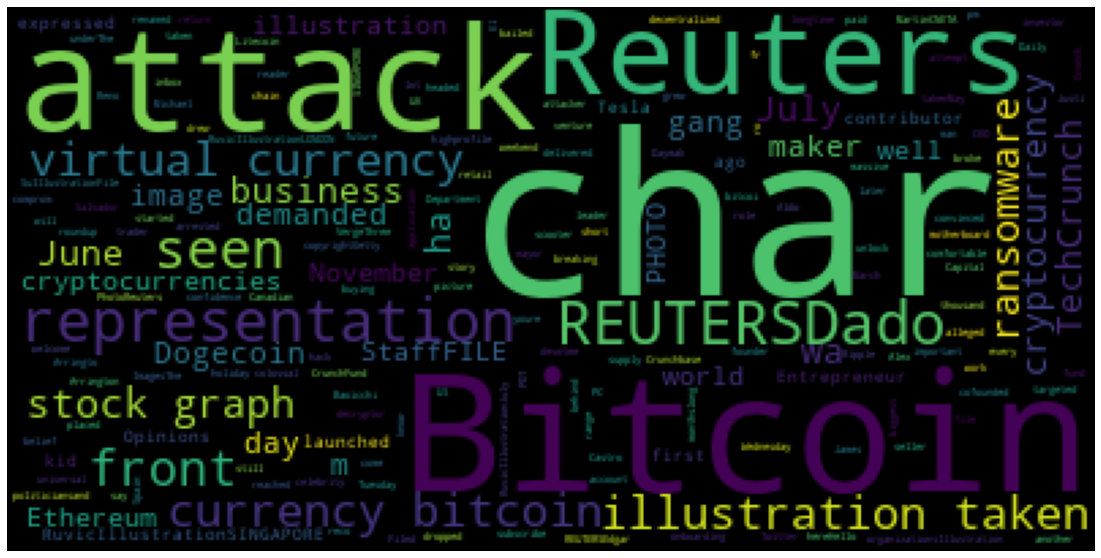

In [ ]:
# Generate the Bitcoin word cloud
input_text = []

for index in bitcoin_df.index:
    input_text.append(" ".join(bitcoin_df['tokens'].loc[index]))

input_text = " ".join(input_text)

wc = WordCloud().generate(input_text)

plt.axis('off')
plt.imshow(wc);

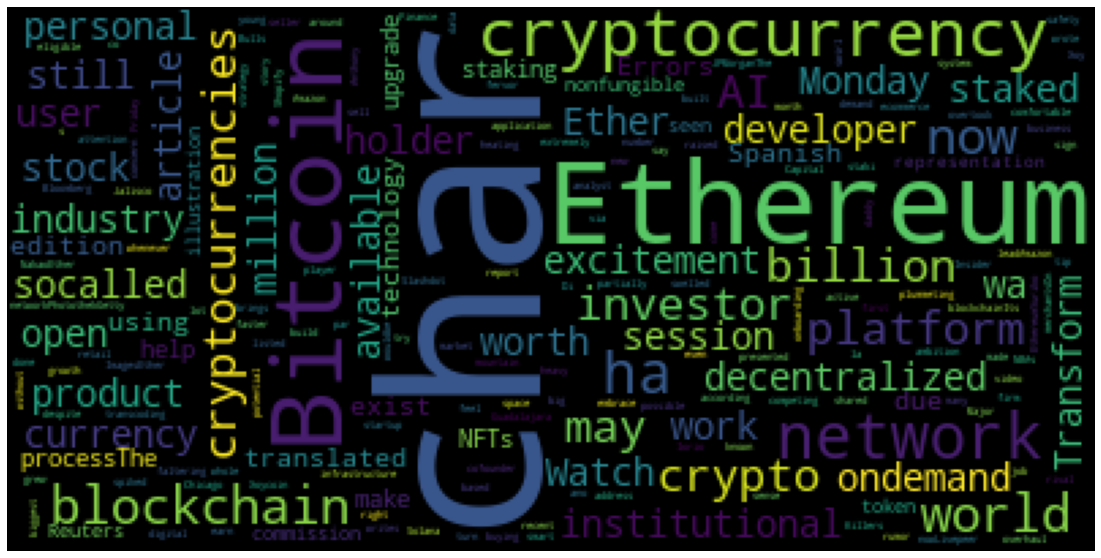

In [ ]:
# Generate the Ethereum word cloud
input_text_eth = []

for index in ethereum_df.index:
    input_text_eth.append(" ".join(ethereum_df['tokens'].loc[index]))

input_text_eth = " ".join(input_text_eth)

wc_eth = WordCloud().generate(input_text_eth)
plt.axis('off')
plt.imshow(wc_eth);

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [ ]:
import spacy
from spacy import displacy

In [ ]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [ ]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [ ]:
# Concatenate all of the Bitcoin text together
bitcoin_all_text = ''
for index in bitcoin_df.index:
    bitcoin_all_text = bitcoin_all_text + '\n' + bitcoin_df['content'].loc[index]
    
#print(bitcoin_all_text)

In [ ]:
# Run the NER processor on all of the text
bitcoin_nlp_text = nlp(bitcoin_all_text)

# Add a title to the document
bitcoin_nlp_text.user_data['title'] ='Bitcoin Named Entity Recognition'

In [ ]:
# Render the visualization
displacy.render(bitcoin_nlp_text, style= 'ent', jupyter = True)

In [ ]:
# List all Entities

list_ent = [(ent.text, ent.label_)for ent in bitcoin_nlp_text.ents]
print(list_ent)

NameError: name 'bitcoin_nlp_text' is not defined

---

### Ethereum NER

In [ ]:
# Concatenate all of the Ethereum text together
ethereum_all_text = ''
for index in ethereum_df.index:
    ethereum_all_text = ethereum_all_text + '\n' + ethereum_df['content'].loc[index]

In [ ]:
# Run the NER processor on all of the text
ethereum_nlp_text = nlp(ethereum_all_text)

# Add a title to the document
ethereum_nlp_text.user_data['title'] ='Ethereum Named Entity Recognition'

In [ ]:
# Render the visualization
displacy.render(ethereum_nlp_text, style= 'ent', jupyter = True)

In [9]:
# List all Entities
list_ent = [(ent.text, ent.label_)for ent in ethereum_nlp_text.ents]
print(list_ent)
    

NameError: name 'ethereum_nlp_text' is not defined

---